In [ ]:
!pip install zipline-tej

### **因為版本相容問題，我們必須將 pandas 的版本改成1.5.3版，並且無須理會安裝完的 Error 。**
**（因應近期 Google Colab 改版，需要新增 dask, distributed 降版指令）**

In [ ]:
!pip install  pandas==1.5.3
!pip install dask==2.30.0   # dask 降版
!pip install distributed==2.30.0   # distributed 降版

### **到這個步驟已經可以正常使用了，我們會用一個簡單的小例子來展示結果，先載入常用套件，並輸入 TEJAPI_KEY 。**

In [1]:
import os
os.environ['TEJAPI_BASE'] = 'https://api.tej.com.tw'
os.environ['TEJAPI_KEY'] = 'your key'

import datetime

import tejapi
import pandas as pd
import numpy as np

In [2]:
from zipline.sources.TEJ_Api_Data import get_universe

### **選出有興趣的公司，這邊先篩選為半導體或電腦產業別的上市公司**

In [3]:
pool = get_universe(start = '2022-07-02',
                    end = '2023-07-02',
                    mkt_bd_e = 'TSE',  # 已上市之股票
                    stktp_e = 'Common Stock',  # 普通股
                    sub_ind_e=['M2324 Semiconductor', 'M2325 Computer and Peripheral Equipment'])
pool

Currently used TEJ API key call quota 319/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 15461736/9223372036854775807 (0.0%)


['2301',
 '2302',
 '2303',
 '2305',
 '2324',
 '2329',
 '2330',
 '2331',
 '2337',
 '2338',
 '2340',
 '2342',
 '2344',
 '2351',
 '2352',
 '2353',
 '2356',
 '2357',
 '2362',
 '2363',
 '2364',
 '2365',
 '2369',
 '2376',
 '2377',
 '2379',
 '2380',
 '2382',
 '2387',
 '2388',
 '2395',
 '2397',
 '2399',
 '2401',
 '2405',
 '2408',
 '2417',
 '2424',
 '2425',
 '2434',
 '2436',
 '2441',
 '2442',
 '2449',
 '2451',
 '2454',
 '2458',
 '2465',
 '2481',
 '2495',
 '3002',
 '3005',
 '3006',
 '3013',
 '3014',
 '3016',
 '3017',
 '3022',
 '3034',
 '3035',
 '3041',
 '3046',
 '3054',
 '3057',
 '3060',
 '3094',
 '3189',
 '3231',
 '3257',
 '3413',
 '3416',
 '3443',
 '3450',
 '3494',
 '3515',
 '3530',
 '3532',
 '3536',
 '3545',
 '3583',
 '3588',
 '3592',
 '3652',
 '3686',
 '3701',
 '3706',
 '3711',
 '3712',
 '4916',
 '4919',
 '4938',
 '4952',
 '4961',
 '4967',
 '4968',
 '5222',
 '5258',
 '5269',
 '5285',
 '5471',
 '6117',
 '6128',
 '6166',
 '6202',
 '6206',
 '6230',
 '6235',
 '6239',
 '6243',
 '6257',
 '6271',
 

In [4]:
import TejToolAPI

start_time = pd.Timestamp('2022-07-02')
end_time = pd.Timestamp('2023-07-02')

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['營業總收入'],
                                   transfer_to_chinese = True)

data  = data.drop_duplicates(subset=['股票代碼'], keep='last').reset_index(drop=True)

data

Currently used TEJ API key call quota 331/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 15532113/9223372036854775807 (0.0%)


,股票代碼,日期,營業總收入_A
0,2301,2023-06-30,34174180.0
1,2302,2023-06-30,167675.0
2,2303,2023-06-30,54209447.0
3,2305,2023-06-30,110990.0
4,2324,2023-06-30,209458784.0
...,...,...,...
132,8163,2023-06-30,6000861.0
133,8210,2023-06-30,1646631.0
134,8261,2023-06-30,655516.0
135,8271,2023-06-30,1911058.0


### **篩選營收最高的五間公司，紀錄其股票代碼。**

In [5]:
data = data.nlargest(5, '營業總收入_A')

data

,股票代碼,日期,營業總收入_A
6,2330,2023-06-30,508632973.0
90,4938,2023-06-30,318136546.0
27,2382,2023-06-30,266180950.0
68,3231,2023-06-30,212000207.0
4,2324,2023-06-30,209458784.0


In [6]:
tickers = data['股票代碼'].unique()

tickers

array(['2330', '4938', '2382', '3231', '2324'], dtype=object)

### **將資料載入本地電腦，方便運行**

In [7]:
start = '2023-07-03'
end = '2024-07-02'

os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant

Merging daily equity files:
Currently used TEJ API key call quota 337/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 15536064/9223372036854775807 (0.0%)


[2024-10-31 06:50:24.720422] INFO: zipline.data.bundles.core: Ingesting tquant.
[2024-10-31 06:50:28.319801] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [8]:
from zipline.data import bundles

bundle_data = bundles.load('tquant')

### **採用與『巴菲特選股策略回測』後半部分相同的分析方法**

In [9]:
from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
    context.day = 0
    context.tickers = tickers
    set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))
    set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))
    set_benchmark(symbol('IR0001'))
    set_liquidity_risk_management_rule(['全額交割股票(Full-Cash Delivery Securities)', '漲停股票(Limit Up)', '跌停股票(Limit Down)', '開盤即鎖死(Limited Whole Day)'])

In [10]:
def handle_data(context, data):

    #回測第一天買進
    if context.day == 0:
        for ticker in context.tickers:
            order_percent(symbol(ticker), 1 / len(tickers))

    context.day += 1

In [11]:
import matplotlib.pyplot as plt

capital_base = 1e6  # 設定初始資金

def analyze(context, results):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
    results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
    ax1.set_ylabel('Portfolio value (TWD)')

    plt.legend(loc = 'upper left')

    plt.gcf().set_size_inches(18, 8)
    plt.grid()
    plt.show()

### **可以看出，策略有成功運行**

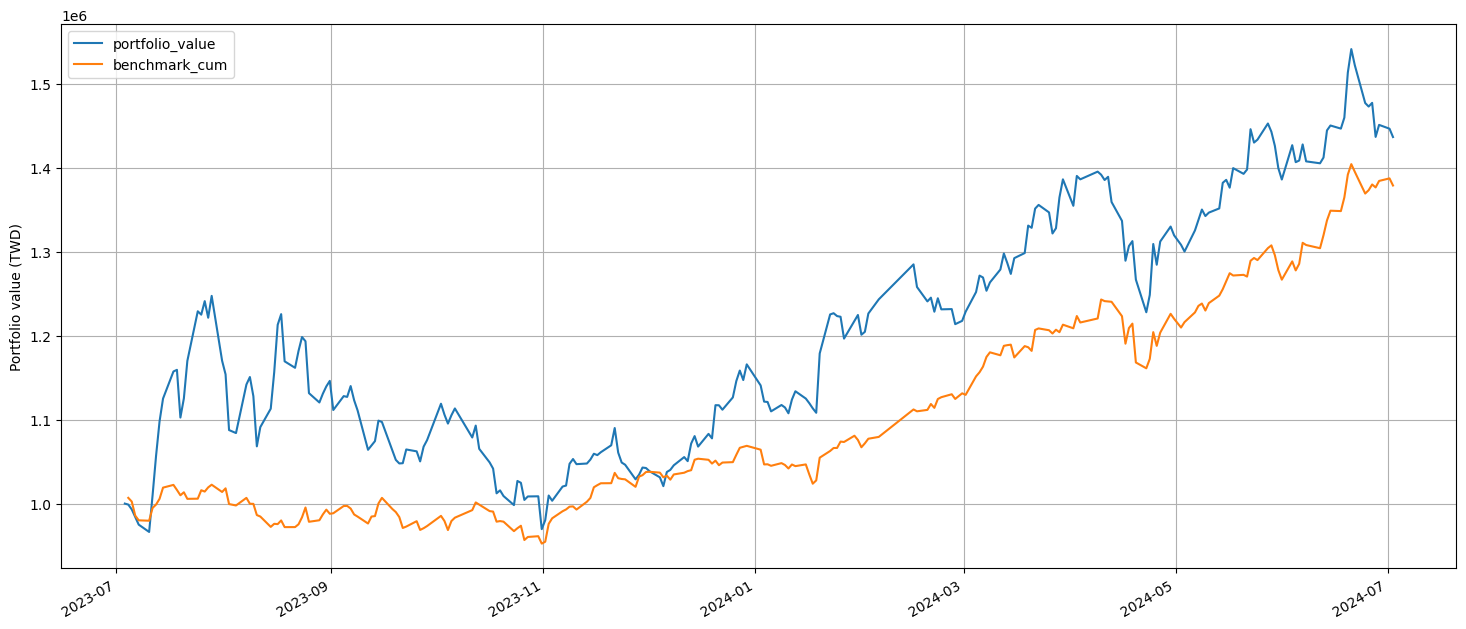

,period_open,period_close,net_leverage,orders,treasury_return,gross_leverage,ending_cash,capital_used,returns,short_exposure,...,trading_days,period_label,benchmark_period_return,excess_return,benchmark_volatility,sortino,sharpe,alpha,beta,benchmark_cum
2023-07-03 13:30:00+08:00,2023-07-03 09:01:00+08:00,2023-07-03 13:30:00+08:00,0.000000,"[{'id': '95b87eefb567484498a27b2e8b8137c2', 'd...",0.0,0.000000,1000000.000000,0.000000,0.000000,0.0,...,1,2023-07,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-04 13:30:00+08:00,2023-07-04 09:01:00+08:00,2023-07-04 13:30:00+08:00,0.808862,"[{'id': '95b87eefb567484498a27b2e8b8137c2', 'd...",0.0,0.808862,190917.298946,-809082.701054,-0.001153,0.0,...,2,2023-07,0.006854,-0.008007,NaN,-11.224972,-11.224972,NaN,NaN,1.006854e+06
2023-07-05 13:30:00+08:00,2023-07-05 09:01:00+08:00,2023-07-05 13:30:00+08:00,1.023571,"[{'id': 'c08a0ddb8d33412dbd42a26c1d6f545b', 'd...",0.0,1.023571,-23407.701059,-214325.000005,-0.005781,0.0,...,3,2023-07,0.002399,-0.009326,0.126594,-10.780737,-11.992013,-0.632599,0.410374,1.002399e+06
2023-07-06 13:30:00+08:00,2023-07-06 09:01:00+08:00,2023-07-06 13:30:00+08:00,1.023786,[],0.0,1.023786,-23407.701059,0.000000,-0.009059,0.0,...,4,2023-07,-0.014287,-0.001637,0.186575,-11.744966,-15.119034,-0.611149,0.335480,9.857128e+05
2023-07-07 13:30:00+08:00,2023-07-07 09:01:00+08:00,2023-07-07 13:30:00+08:00,1.024009,[],0.0,1.024009,-23407.701059,0.000000,-0.009277,0.0,...,5,2023-07,-0.019923,-0.005130,0.152535,-12.595148,-18.508146,-0.686937,0.345068,9.800768e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 13:30:00+08:00,2024-06-26 09:01:00+08:00,2024-06-26 13:30:00+08:00,1.000566,[],0.0,1.000566,-835.473616,0.000000,0.002995,0.0,...,241,2024-06,0.380148,0.097219,0.142144,2.217382,1.464926,-0.019800,1.373320,1.380148e+06
2024-06-27 13:30:00+08:00,2024-06-27 09:01:00+08:00,2024-06-27 13:30:00+08:00,1.000581,[],0.0,1.000581,-835.473616,0.000000,-0.027468,0.0,...,242,2024-06,0.376617,0.060170,0.141905,2.054664,1.363723,-0.045579,1.378206,1.376617e+06
2024-06-28 13:30:00+08:00,2024-06-28 09:01:00+08:00,2024-06-28 13:30:00+08:00,1.000576,[],0.0,1.000576,-835.473616,0.000000,0.009978,0.0,...,243,2024-06,0.384354,0.066769,0.141677,2.100406,1.393585,-0.043351,1.378740,1.384354e+06
2024-07-01 13:30:00+08:00,2024-07-01 09:01:00+08:00,2024-07-01 13:30:00+08:00,1.000578,[],0.0,1.000578,-835.473616,0.000000,-0.003134,0.0,...,244,2024-07,0.387400,0.059175,0.141386,2.080186,1.380171,-0.049194,1.378486,1.387400e+06


In [12]:
from zipline import run_algorithm

start_date = pd.Timestamp('20230703', tz = 'utc')
end_date = pd.Timestamp('20240702', tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

results

### **在繪製夏普比率圖時使用 Pyfolio 的套件，雖然圖有成功跑出來，但會出現無法找到對應字型的警告**

In [13]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio as pf

# 從 results 資料表中取出 returns, positions & transactions
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

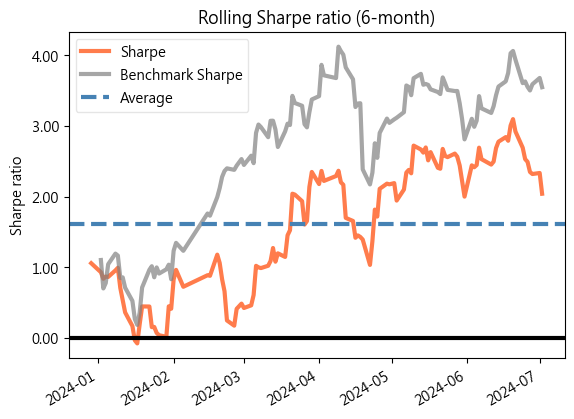

In [14]:
# 繪製夏普比率圖
from pyfolio.plotting import plot_rolling_sharpe

plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets)

### **所以在這邊我們手動安裝字型，再試一次之後會發現沒有警告了**

In [ ]:
import matplotlib
!wget -O MicrosoftJhengHei.ttf https://drive.google.com/uc?id=1nMlvxPOPUGkHxYD5kuP8Ur37EmKlZAW_&export=download
!wget -O ArialUnicodeMS.ttf https://drive.google.com/uc?id=1Y4O8Flv7lfrzHqOE8dkFTSctyYOpAJ0N&export=download
matplotlib.font_manager.fontManager.addfont('MicrosoftJhengHei.ttf')
matplotlib.rc('font', family='sans-serif')

matplotlib.font_manager.fontManager.addfont('ArialUnicodeMS.ttf')
matplotlib.rc('font', family='sans-serif')

--2024-07-04 01:43:42--  https://drive.google.com/uc?id=1nMlvxPOPUGkHxYD5kuP8Ur37EmKlZAW_
Resolving drive.google.com (drive.google.com)... 173.194.210.102, 173.194.210.113, 173.194.210.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nMlvxPOPUGkHxYD5kuP8Ur37EmKlZAW_ [following]
--2024-07-04 01:43:42--  https://drive.usercontent.google.com/download?id=1nMlvxPOPUGkHxYD5kuP8Ur37EmKlZAW_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21663376 (21M) [application/octet-stream]
Saving to: ‘MicrosoftJhengHei.ttf’

MicrosoftJhengHei.t 100%[===================>]  20.66M  58.5MB/s    in 0.4s    

2024-07-04 01:43:45 

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

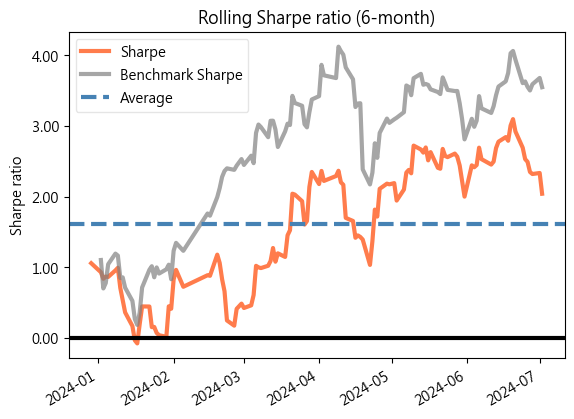

In [15]:
# 再繪製一次夏普比率圖，看是否跳出warning
plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets)